### Libray Files

In [4]:
import telegram
import requests
from datetime import datetime
import pytz

In [5]:
import cv2
import os
import uuid
import time
import torch
import numpy as np
from matplotlib import pyplot as plt
from django.shortcuts import render

## Function of sending photo through telegram i.e., send_pht_te()
##### Bot Token id= 5663253485:AAE4VE1gVwczfH8GxULFjN5t6BBMoH83wFI
##### Group Chat id = -1001889986573

In [6]:
#photo_path=open("D://Chrome Downloads//Major images//org_img//org_train//images//train1.jpg","rb")
#photo_path=open("filepath","rb")

#1001889986573 1805300271

def send_pht_te(photo_path):
    base_url="https://api.telegram.org/bot5663253485:AAE4VE1gVwczfH8GxULFjN5t6BBMoH83wFI/sendPhoto"
    parameters={
        "chat_id": "-1001889986573",
        "caption":"Vehicle Without Number Plate"
    }
    my_file={
        "photo" : photo_path
    }
    resp=requests.get(base_url,data=parameters,files=my_file)
    print(resp.text)


#send_pht_te(photo_path=open("D://Chrome Downloads//Major images//org_img//org_train//images//train2.jpg","rb"))

#### To Run The Object Detection Model

In [8]:
import torch
#D:\Chrome Downloads\Mini References is file path
model = torch.hub.load('ultralytics/yolov5', 'custom', path='D:\Chrome Downloads\Mini References\last.pt', force_reload=True)
#D:\Chrome Downloads\Major images\last.pt

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\SUSHMA REDDY/.cache\torch\hub\master.zip
YOLOv5  2023-3-17 Python-3.9.13 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [9]:

cap=cv2.VideoCapture(0)
#address="https:/192.168.0.100:8080/video"
#cap.open(address)
# the above two lines for the ip web cam
while cap.isOpened():
    ret,frame= cap.read()
    frame = cv2.resize(frame, (480,640))
    #frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RBG)
    results=model(frame)
    
    
    if len(results.xywh[0]) > 0:
        dconf = results.xywh[0][0][4]
        dclass = results.xywh[0][0][5]
        
        # If the frame does not contain a number plate, save the image to a file and send it to the Telegram group
        if dconf.item()>0.35 and dclass.item() == 0.0:
            cv2.imwrite('no_number_plate_image.jpg', frame)
            send_pht_te(photo_path=open('no_number_plate_image.jpg', 'rb'))
        
        
    cv2.imshow('YOLO',np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
    
    

{"ok":true,"result":{"message_id":108,"from":{"id":5663253485,"is_bot":true,"first_name":"Jaibalayya","username":"Nonumptbot"},"chat":{"id":-1001889986573,"title":"No Number Plate","username":"no_num_plate","type":"supergroup"},"date":1679066043,"photo":[{"file_id":"AgACAgUAAx0EcKboDQADbGQUg7s5wLvD7EkmRBTm40CQqQqmAAIyszEbxqepVNhts9yxfuxLAQADAgADcwADLwQ","file_unique_id":"AQADMrMxG8anqVR4","file_size":1506,"width":67,"height":90},{"file_id":"AgACAgUAAx0EcKboDQADbGQUg7s5wLvD7EkmRBTm40CQqQqmAAIyszEbxqepVNhts9yxfuxLAQADAgADbQADLwQ","file_unique_id":"AQADMrMxG8anqVRy","file_size":14932,"width":240,"height":320},{"file_id":"AgACAgUAAx0EcKboDQADbGQUg7s5wLvD7EkmRBTm40CQqQqmAAIyszEbxqepVNhts9yxfuxLAQADAgADeAADLwQ","file_unique_id":"AQADMrMxG8anqVR9","file_size":40657,"width":480,"height":640}],"caption":"Vehicle Without Number Plate"}}
{"ok":true,"result":{"message_id":109,"from":{"id":5663253485,"is_bot":true,"first_name":"Jaibalayya","username":"Nonumptbot"},"chat":{"id":-1001889986573,"title

{"ok":true,"result":{"message_id":118,"from":{"id":5663253485,"is_bot":true,"first_name":"Jaibalayya","username":"Nonumptbot"},"chat":{"id":-1001889986573,"title":"No Number Plate","username":"no_num_plate","type":"supergroup"},"date":1679066090,"photo":[{"file_id":"AgACAgUAAx0EcKboDQADdmQUg-r0Xzy0HBWj6XWCJODQfh4hAAI8szEbxqepVEeZYbsUhPMwAQADAgADcwADLwQ","file_unique_id":"AQADPLMxG8anqVR4","file_size":1460,"width":67,"height":90},{"file_id":"AgACAgUAAx0EcKboDQADdmQUg-r0Xzy0HBWj6XWCJODQfh4hAAI8szEbxqepVEeZYbsUhPMwAQADAgADbQADLwQ","file_unique_id":"AQADPLMxG8anqVRy","file_size":13632,"width":240,"height":320},{"file_id":"AgACAgUAAx0EcKboDQADdmQUg-r0Xzy0HBWj6XWCJODQfh4hAAI8szEbxqepVEeZYbsUhPMwAQADAgADeAADLwQ","file_unique_id":"AQADPLMxG8anqVR9","file_size":38410,"width":480,"height":640}],"caption":"Vehicle Without Number Plate"}}
{"ok":true,"result":{"message_id":119,"from":{"id":5663253485,"is_bot":true,"first_name":"Jaibalayya","username":"Nonumptbot"},"chat":{"id":-1001889986573,"title

In [35]:
img=os.path.join('data','images','D:\\Chrome Downloads\\Major images\\test\\test31.jpg')

In [36]:
results=model(img)

In [37]:
results.print()

image 1/1: 640x640 1 No Number Plate
Speed: 45.7ms pre-process, 438.7ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


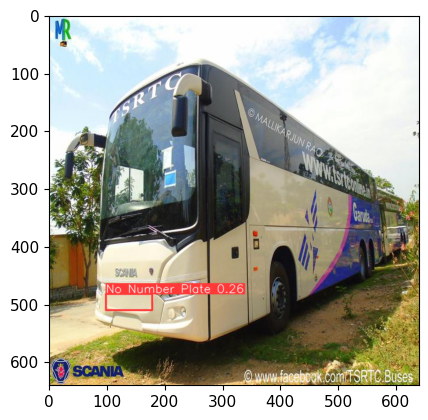

In [38]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()